In [22]:
from astroNN.datasets import galaxy10
from astroNN.datasets.galaxy10 import galaxy10cls_lookup
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
import pydot


In [15]:
# Load the dataset
images, labels = galaxy10.load_data()

# Normalize pixel values
images = images.astype('float32') / 255.0

# Convert labels to one-hot encoding
labels = to_categorical(labels, num_classes=10)

# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, random_state=42
)

C:\Users\ddaga\.astroNN\datasets\Galaxy10_DECals.h5 was found!


In [16]:
model_deep = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model_deep.summary()

d:\Projects\galaxy-classifier\env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,375,882 (12.88 MB)

 Trainable params: 3,375,882 (12.88 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model_deep.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3, verbose=2, mode='auto')

In [27]:
print("Plotting model...")

plot_model(model_deep, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

print("Model plotted successfully.")


Plotting model...
You must install pydot (`pip install pydot`) for `plot_model` to work.
Model plotted successfully.


In [19]:
history_deep = model_deep.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), callbacks=[monitor])


Epoch 1/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 185s 412ms/step - accuracy: 0.1625 - loss: 2.1816 - val_accuracy: 0.3630 - val_loss: 1.6715
Epoch 2/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 185s 417ms/step - accuracy: 0.3677 - loss: 1.6624 - val_accuracy: 0.4673 - val_loss: 1.3997
Epoch 3/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 197s 445ms/step - accuracy: 0.4965 - loss: 1.3654 - val_accuracy: 0.5575 - val_loss: 1.2361
Epoch 4/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 187s 422ms/step - accuracy: 0.5784 - loss: 1.1643 - val_accuracy: 0.5986 - val_loss: 1.1168
Epoch 5/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 195s 438ms/step - accuracy: 0.6340 - loss: 1.0201 - val_accuracy: 0.6158 - val_loss: 1.0718
Epoch 6/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 189s 426ms/step - accuracy: 0.6835 - loss: 0.8760 - val_accuracy: 0.6046 - val_loss: 1.1185
Epoch 7/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 198s 446ms/step - accuracy: 0.7266 - loss: 0.7630 - val_accuracy: 0.6223 - val_loss: 1.1372
Epoch 8/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 202s 455ms/step - accuracy: 0.7738 -

In [20]:
deep_eval = model_deep.evaluate(test_images, test_labels)
print(f'Deep CNN Test Accuracy: {deep_eval[1]}')


111/111 ━━━━━━━━━━━━━━━━━━━━ 12s 107ms/step - accuracy: 0.5694 - loss: 1.3931
Deep CNN Test Accuracy: 0.5845546722412109


111/111 ━━━━━━━━━━━━━━━━━━━━ 11s 101ms/step


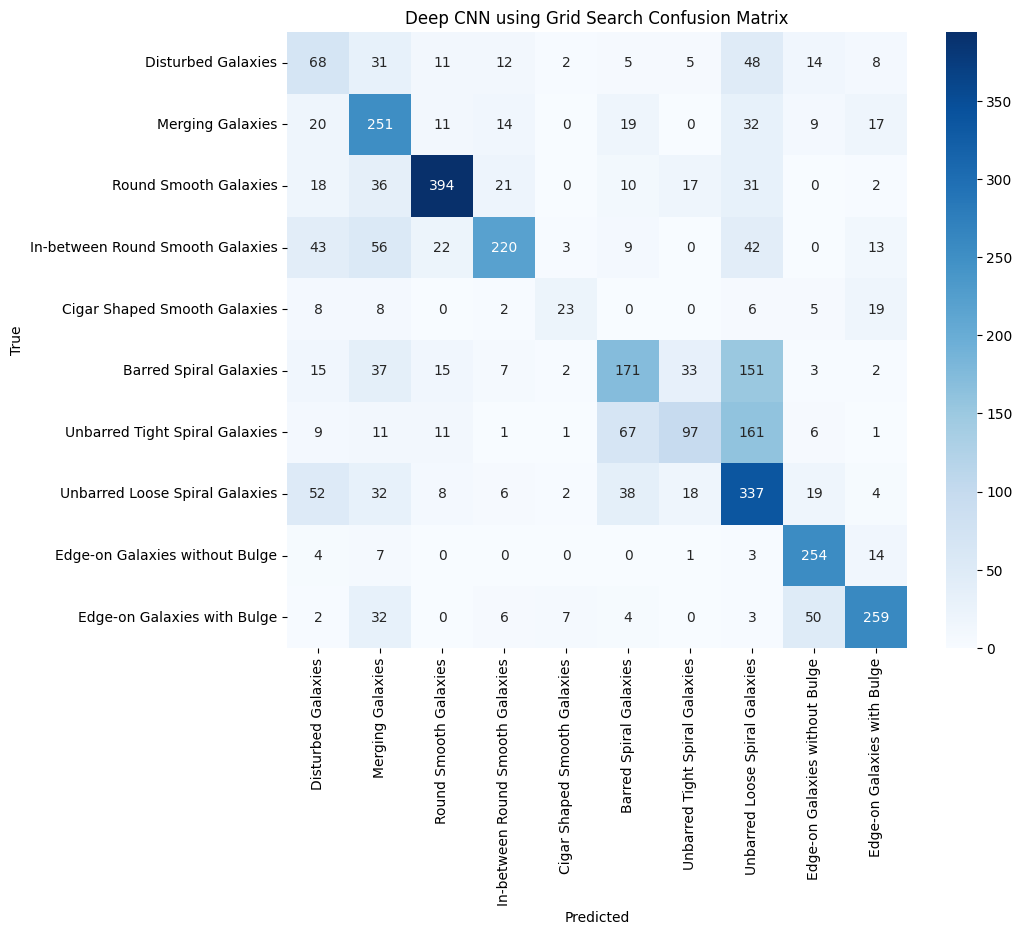

In [21]:
predictions = model_deep.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

galaxy_classes = [
    "Disturbed Galaxies",
    "Merging Galaxies",
    "Round Smooth Galaxies",
    "In-between Round Smooth Galaxies",
    "Cigar Shaped Smooth Galaxies",
    "Barred Spiral Galaxies",
    "Unbarred Tight Spiral Galaxies",
    "Unbarred Loose Spiral Galaxies",
    "Edge-on Galaxies without Bulge",
    "Edge-on Galaxies with Bulge"
]


# Assuming test_labels are one-hot encoded, get the true classes
true_classes = np.argmax(test_labels, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=galaxy_classes, yticklabels=galaxy_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Deep CNN using Grid Search Confusion Matrix')
plt.show()